<a href="https://colab.research.google.com/github/drshahizan/Python_EDA/blob/main/assignment/ass3/hpdp/ByteNav/ass3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment 3: Exploratory Data Analysis (EDA) Using Big Data
## Group: Byte Navigators (ByteNav)

## Group Member:
<table>
  <tr>
    <th>Name</th>
    <th>Matric Number</th>
  </tr>
  <tr>
    <th>LOO ZHI YUAN</th>
    <th>A21EC0197</th>
  </tr>
  <tr>
    <th>LAU YEE CHI</th>
    <th>A21EC0042</th>
  </tr>
  <tr>
    <th>SOO WAN YING</th>
    <th>A21EC0227</th>
  </tr>
    <tr>
    <th>YEW RUI XIANG</th>
    <th>A21EC0149</th>
  </tr>
</table>

## 1. Dataset Selection
For assignment 3, we have choose a large dataset which is fullfil the requirement of more than 1 million data dataset from [Kaggle](https://www.kaggle.com/). We have choose a 501.79 MB ".csv" dataset which consist of 4264752 rows and 9 columns which are "event_time", "event_type", "product_id", "category_id", "category_code", "brand", "price", "user_id" and "user_session".

The title of the dataset is "**eCommerce Events History in Cosmetics Shop**" and we have choose the data of January 2020 which is "2020-Jan.csv" dataset.

Source of dataset:
https://www.kaggle.com/datasets/mkechinov/ecommerce-events-history-in-cosmetics-shop/data

| Property         | Description                                                                                                       |
|------------------|-------------------------------------------------------------------------------------------------------------------|
| event_time       | Time when event happened at (in UTC).                                                                            |
| event_type       | Only one kind of event: purchase.                                                                                 |
| product_id       | ID of a product.                                                                                                  |
| category_id      | Product's category ID.                                                                                            |
| category_code    | Product's category taxonomy (code name) if it was possible to make it. Usually present for meaningful categories and skipped for different kinds of accessories. |
| brand            | Downcased string of brand name. Can be missed.                                                                   |
| price            | Float price of a product. Present.                                                                               |
| user_id          | Permanent user ID.                                                                                               |
| user_session     | Temporary user's session ID. Same for each user's session. Is changed every time user comes back to the online store from a long pause.             |


## 2. Data Acquisition

### 2.1. Import Dataset

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

#Mount google colab to my personal google drive

Mounted at /content/drive


In [ ]:
import pandas as pd
import zipfile

# Define the path to the ZIP file
zip_file_path = '/content/drive/MyDrive/2020-Jan.csv.zip'

# Define the extraction directory
extraction_path = '/content/drive/MyDrive'

# Extract the ZIP file to the extraction directory
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extraction_path)

df = pd.read_csv('/content/drive/My Drive/2020-Jan.csv.zip',compression='zip')

In [ ]:
df.head()

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session
0,2020-01-01 00:00:00 UTC,view,5809910,1602943681873052386,NaN,grattol,5.24,595414620,4adb70bb-edbd-4981-b60f-a05bfd32683a
1,2020-01-01 00:00:09 UTC,view,5812943,1487580012121948301,NaN,kinetics,3.97,595414640,c8c5205d-be43-4f1d-aa56-4828b8151c8a
2,2020-01-01 00:00:19 UTC,view,5798924,1783999068867920626,NaN,zinger,3.97,595412617,46a5010f-bd69-4fbe-a00d-bb17aa7b46f3
3,2020-01-01 00:00:24 UTC,view,5793052,1487580005754995573,NaN,NaN,4.92,420652863,546f6af3-a517-4752-a98b-80c4c5860711
4,2020-01-01 00:00:25 UTC,view,5899926,2115334439910245200,NaN,NaN,3.92,484071203,cff70ddf-529e-4b0c-a4fc-f43a749c0acb


## 3. Setting Up the Environment

### 3.1. Install Necessary Tools & Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import dask.dataframe as dd
import os
import missingno as msno
import datetime

## 4. Data Preprocessing

### 4.1. Data Exploration

In [ ]:
df.head()

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session
0,2020-01-01 00:00:00 UTC,view,5809910,1602943681873052386,NaN,grattol,5.24,595414620,4adb70bb-edbd-4981-b60f-a05bfd32683a
1,2020-01-01 00:00:09 UTC,view,5812943,1487580012121948301,NaN,kinetics,3.97,595414640,c8c5205d-be43-4f1d-aa56-4828b8151c8a
2,2020-01-01 00:00:19 UTC,view,5798924,1783999068867920626,NaN,zinger,3.97,595412617,46a5010f-bd69-4fbe-a00d-bb17aa7b46f3
3,2020-01-01 00:00:24 UTC,view,5793052,1487580005754995573,NaN,NaN,4.92,420652863,546f6af3-a517-4752-a98b-80c4c5860711
4,2020-01-01 00:00:25 UTC,view,5899926,2115334439910245200,NaN,NaN,3.92,484071203,cff70ddf-529e-4b0c-a4fc-f43a749c0acb


In [ ]:
df.tail()

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session
4264747,2020-01-31 23:59:52 UTC,remove_from_cart,5886774,1487580006317032337,NaN,NaN,1.59,607092857,a4ccd1c4-a9d2-48d0-9816-082ec5bb5e47
4264748,2020-01-31 23:59:52 UTC,remove_from_cart,5886774,1487580006317032337,NaN,NaN,1.59,607092857,a4ccd1c4-a9d2-48d0-9816-082ec5bb5e47
4264749,2020-01-31 23:59:53 UTC,view,5875432,2084144451428549153,NaN,NaN,2.05,423651741,fb42a963-abef-4c4f-b1ba-f5812dd54e80
4264750,2020-01-31 23:59:57 UTC,remove_from_cart,5820745,1487580006317032337,NaN,NaN,2.22,607092857,a4ccd1c4-a9d2-48d0-9816-082ec5bb5e47
4264751,2020-01-31 23:59:58 UTC,remove_from_cart,5820745,1487580006317032337,NaN,NaN,2.22,607092857,a4ccd1c4-a9d2-48d0-9816-082ec5bb5e47


In [ ]:
df.shape

(4264752, 9)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4264752 entries, 0 to 4264751
Data columns (total 9 columns):
 #   Column         Dtype  
---  ------         -----  
 0   event_time     object 
 1   event_type     object 
 2   product_id     int64  
 3   category_id    int64  
 4   category_code  object 
 5   brand          object 
 6   price          float64
 7   user_id        int64  
 8   user_session   object 
dtypes: float64(1), int64(3), object(5)
memory usage: 292.8+ MB


In [ ]:
df.describe(include='float64')

,price
count,4.264752e+06
mean,8.713981e+00
std,1.963959e+01
min,-7.937000e+01
25%,2.350000e+00
50%,4.060000e+00
75%,7.140000e+00
max,3.277800e+02


### 4.2. Data Cleaning and Handling

#### 4.2.1. Handle Missing Values

In [ ]:
#Determine the sum of null values for each columns
df.isna().sum()

event_time             0
event_type             0
product_id             0
category_id            0
category_code    4190033
brand            1775630
price                  0
user_id                0
user_session        1314
dtype: int64

<Axes: >

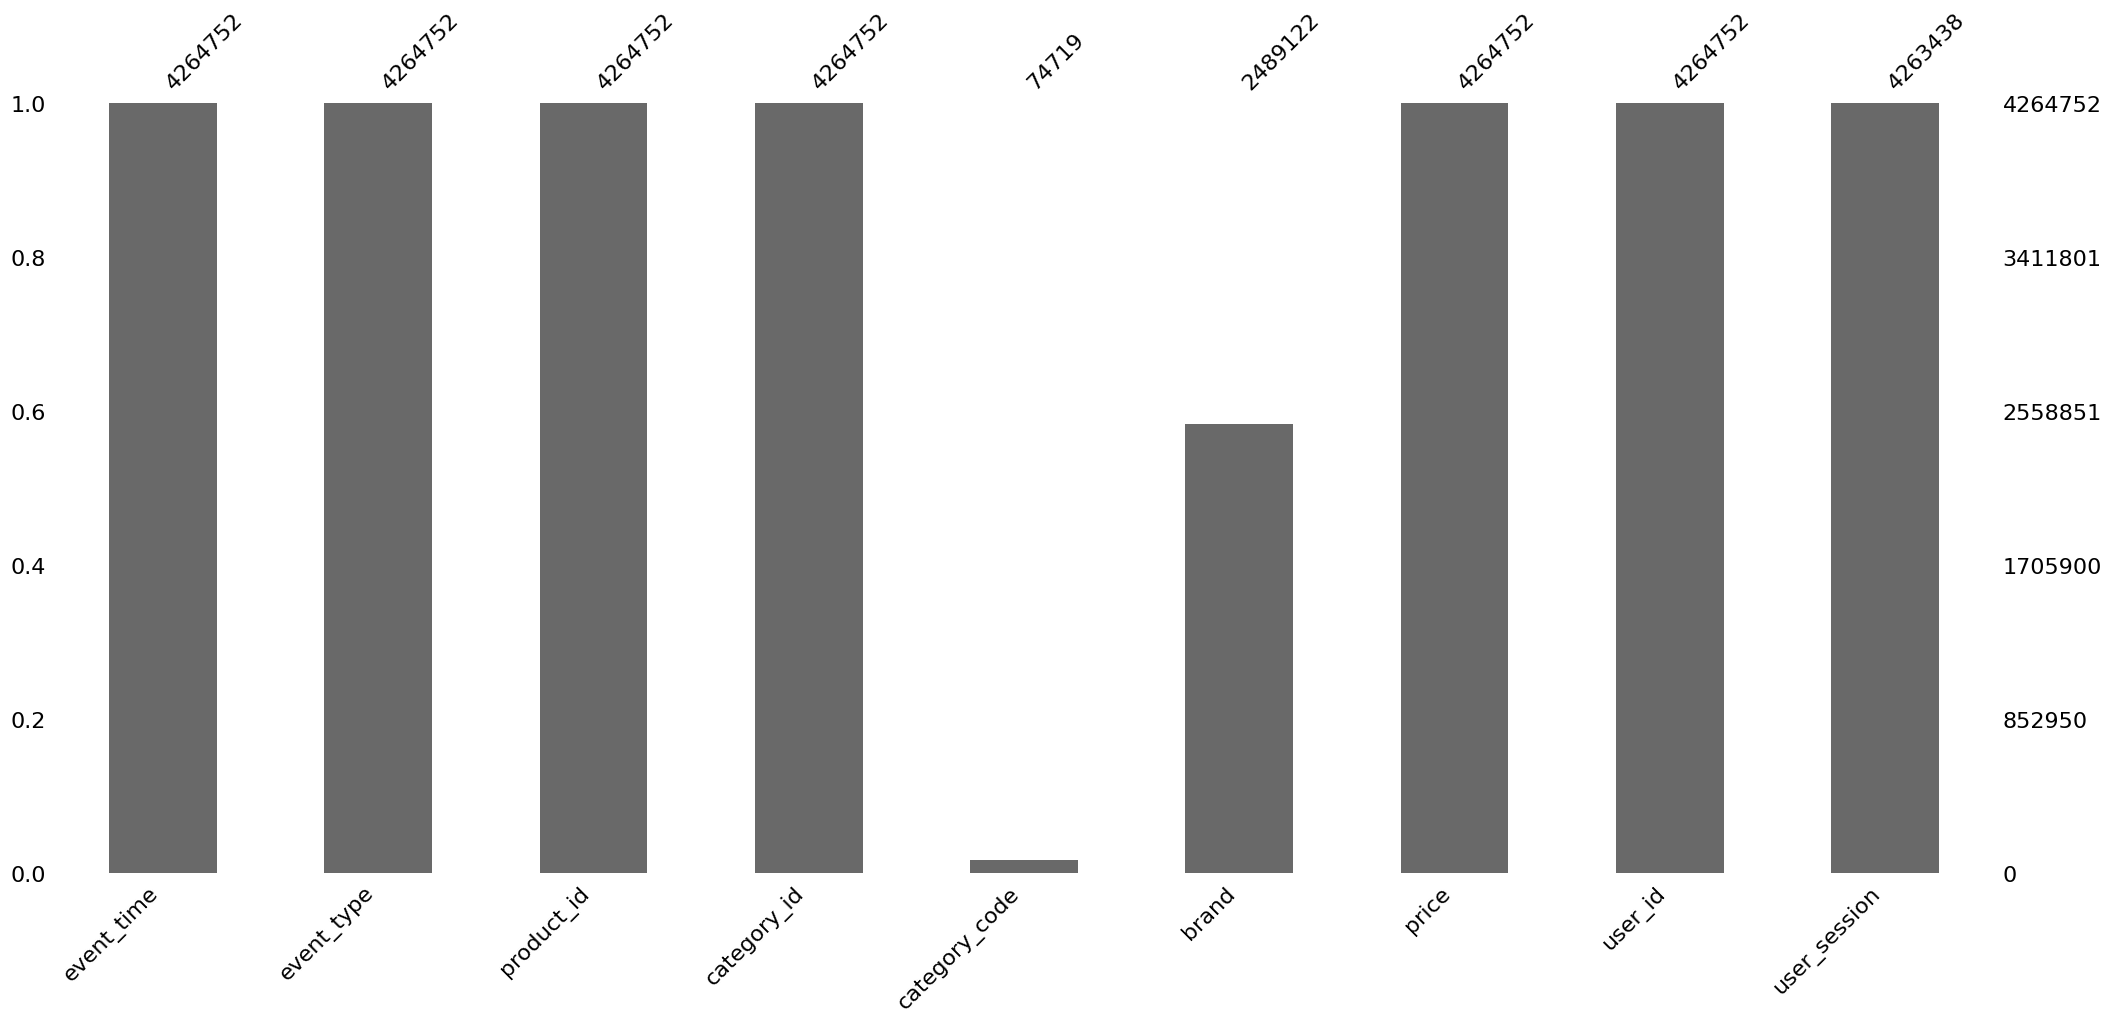

In [ ]:
#Plot and visualise the bar chart of missing values
msno.bar(df)

<Axes: >

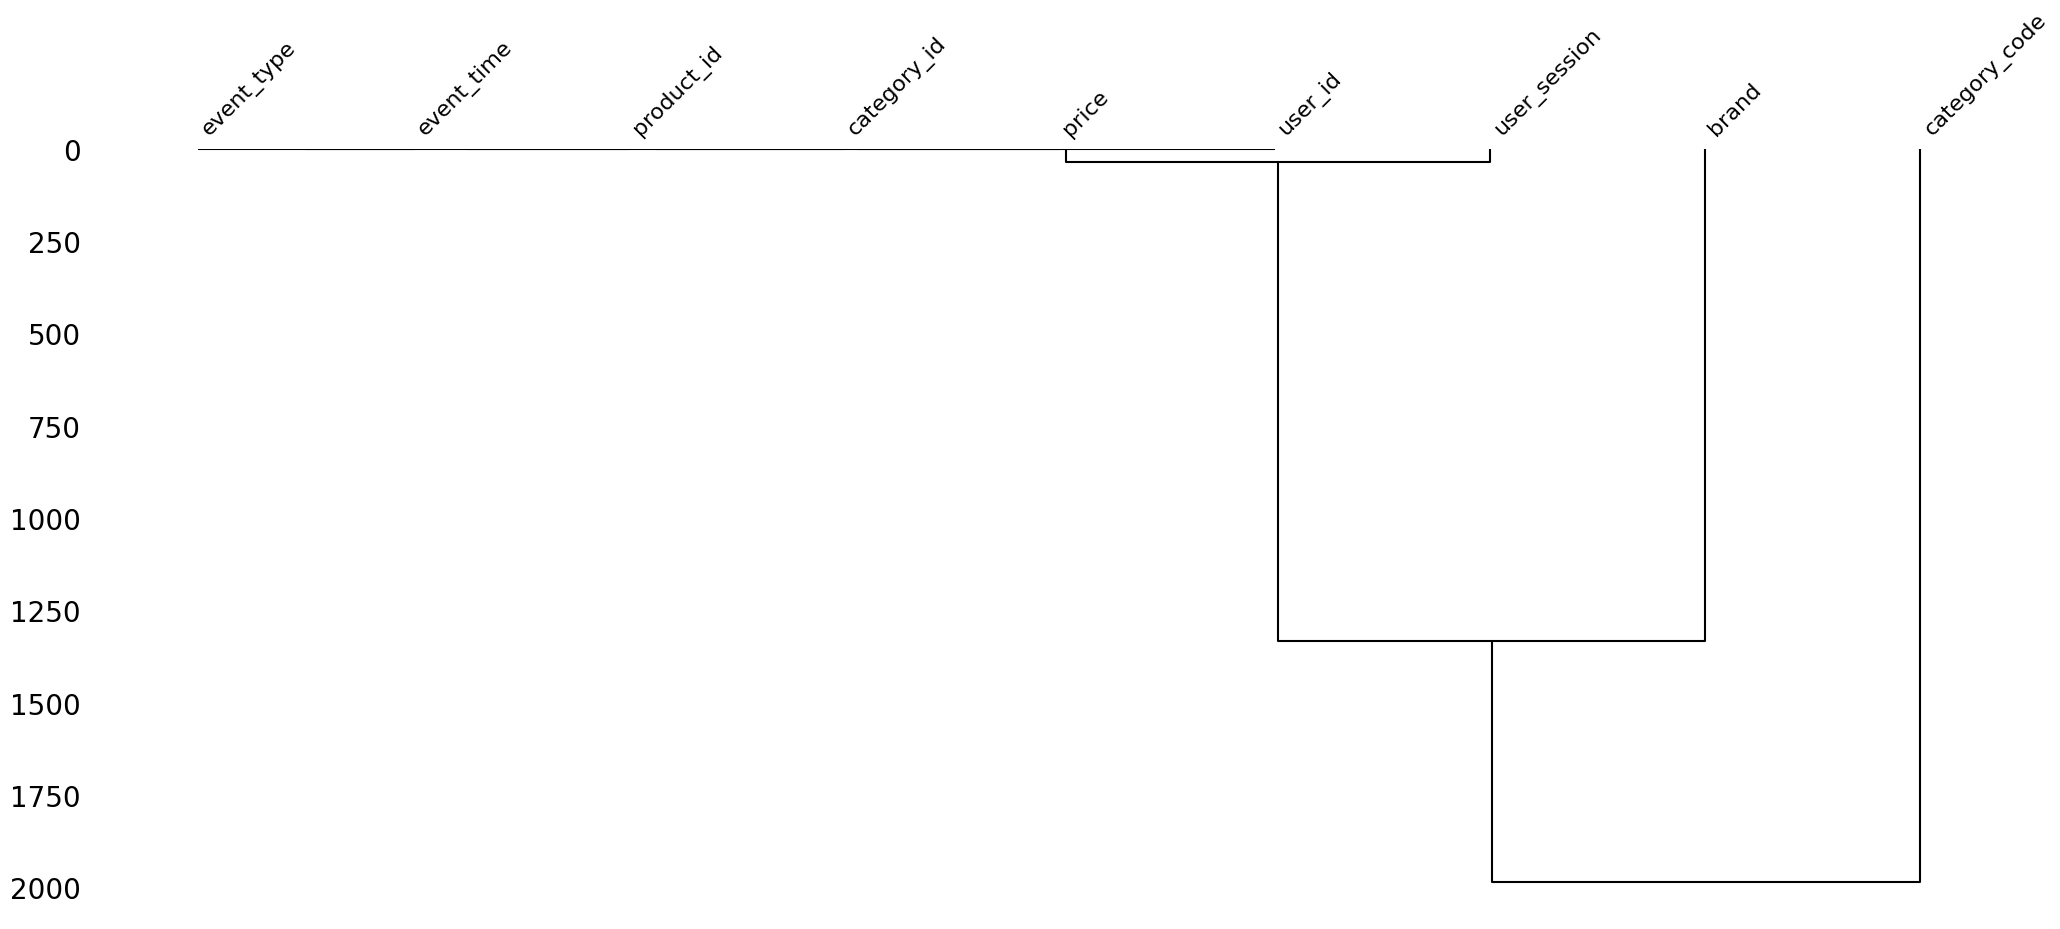

In [ ]:
#Plot and visualise the dendrogram of missing values
msno.dendrogram(df)

<Axes: >

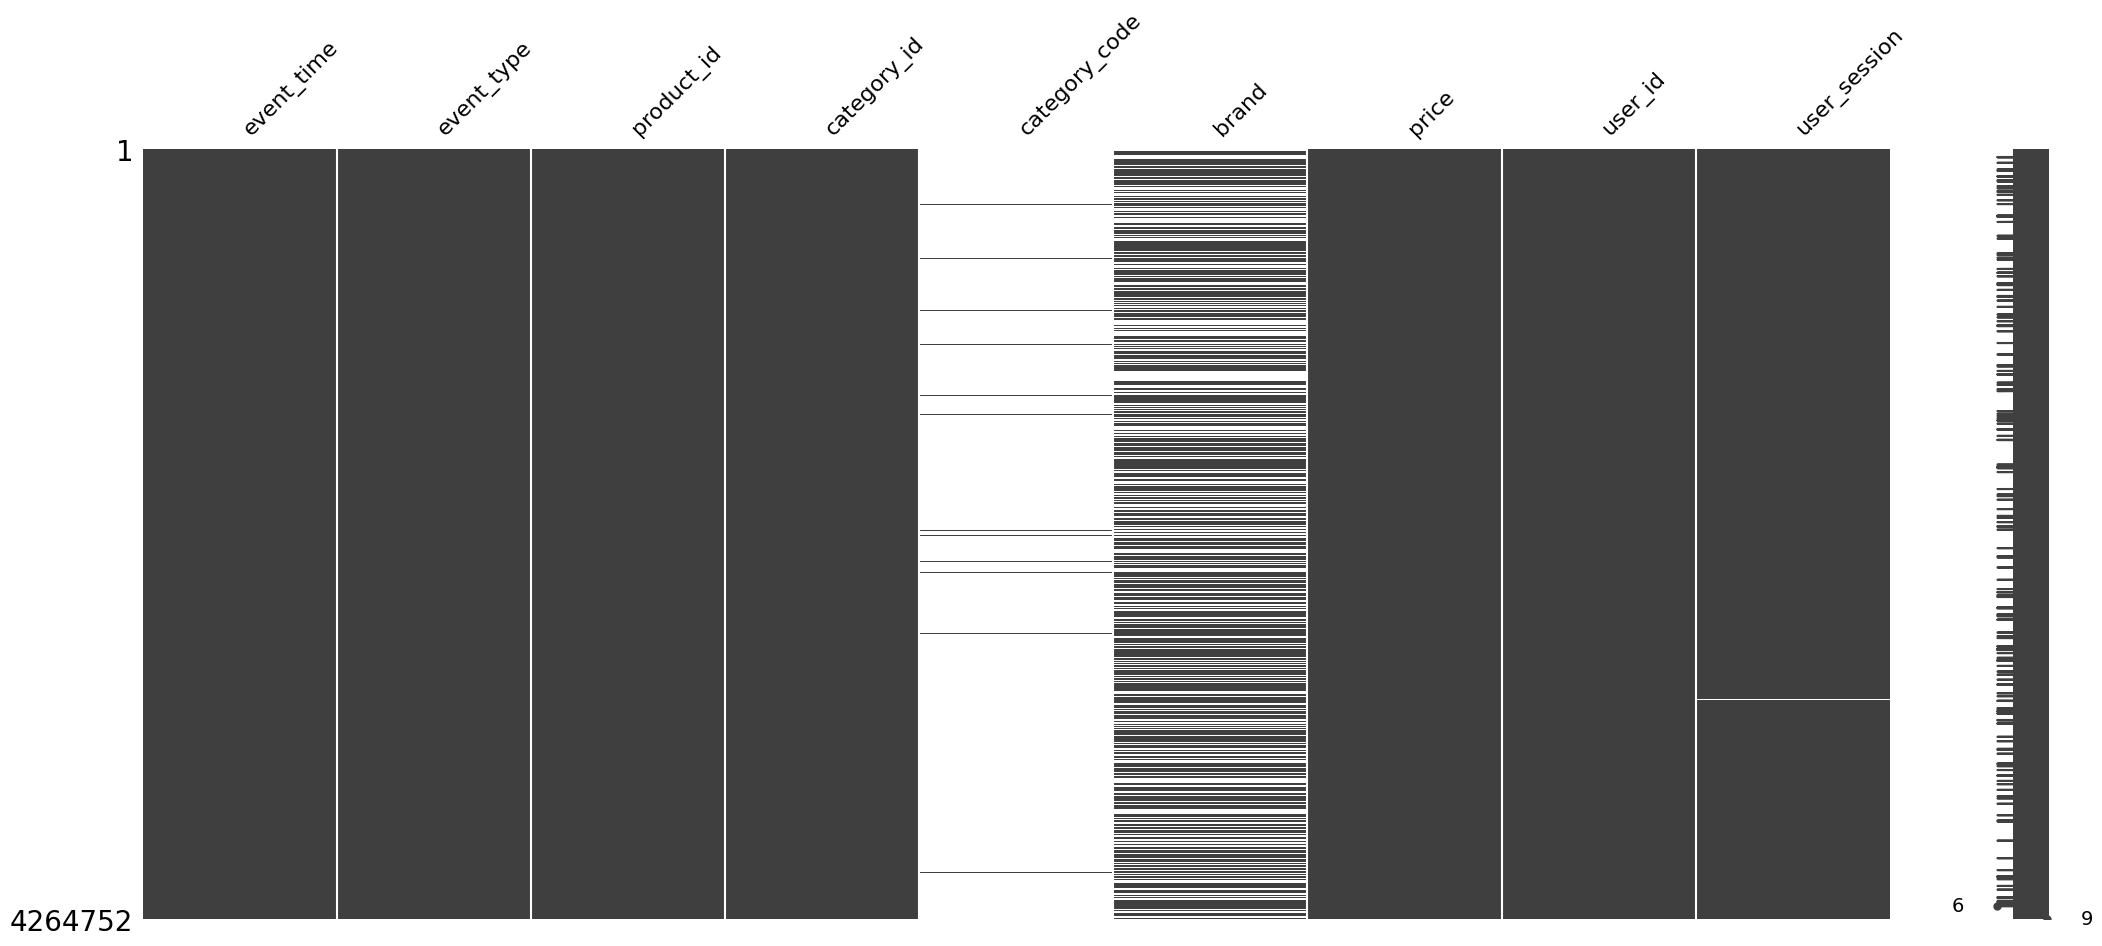

In [ ]:
#Plot and visualise the matrix of missing values
msno.matrix(df)

**Checking and droping columns consisting null values greater than 90%**



In [ ]:
#Calculate the percentage of null values for each columns
percent = df.isna().sum() * 100 / len(df)
print(round(percent,2))

event_time        0.00
event_type        0.00
product_id        0.00
category_id       0.00
category_code    98.25
brand            41.64
price             0.00
user_id           0.00
user_session      0.03
dtype: float64


In [ ]:
#Drop the columns consisting null values greater than 90%
columns_needed = percent[percent < 90.00].index
df = df[columns_needed]

The column **category_code** is dropped.


In [ ]:
df.columns

Index(['event_time', 'event_type', 'product_id', 'category_id', 'brand',
       'price', 'user_id', 'user_session'],
      dtype='object')

**Replace the missing vaules in 'brand' column with 'unknown'**

In [ ]:
df['brand'].fillna(value='unknown', inplace=True)

**Replace the missing vaules in 'user_session' column with mode value**

In [ ]:
mode_value_user_session = df['user_session'].mode()[0]
df.fillna(value=mode_value_user_session, inplace=True)

#### 4.2.2. Handle Duplicated

In [ ]:
#Determine the sum of duplicated rows or values for the dataset
df.duplicated().sum()

225100

In [ ]:
#Calculate the percentage of duplicated rows for the dataset
percent = df.duplicated().sum() * 100 / len(df)
print("Percantage of dulplicates: " + str(round(percent,2)) + "%")

Percantage of dulplicates: 5.28%


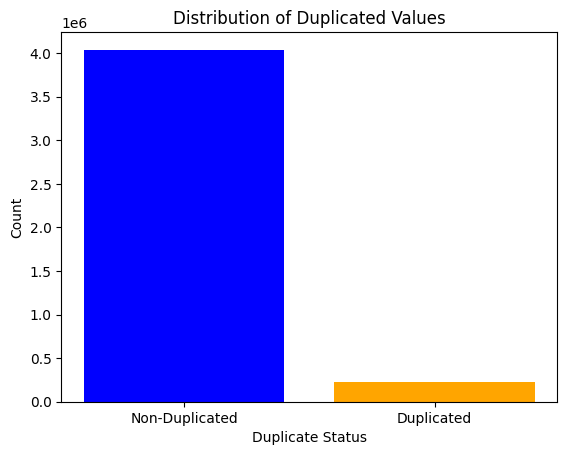

In [ ]:
#Plot and visualise the duplicated values by using histogram
duplicates_count = df.duplicated().sum()
plt.bar(['Non-Duplicated', 'Duplicated'], [len(df) - duplicates_count, duplicates_count], color=['blue', 'orange'])
plt.title("Distribution of Duplicated Values")
plt.xlabel("Duplicate Status")
plt.ylabel("Count")
plt.show()

In [ ]:
#Drop or remove the duplicated rows in the dataset and modify it in place
df.drop_duplicates(inplace=True)

#### 4.2.3. Handling Datatypes

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4039652 entries, 0 to 4264751
Data columns (total 8 columns):
 #   Column        Dtype  
---  ------        -----  
 0   event_time    object 
 1   event_type    object 
 2   product_id    int64  
 3   category_id   int64  
 4   brand         object 
 5   price         float64
 6   user_id       int64  
 7   user_session  object 
dtypes: float64(1), int64(3), object(4)
memory usage: 277.4+ MB


In [ ]:
df.event_time

0          2020-01-01 00:00:00 UTC
1          2020-01-01 00:00:09 UTC
2          2020-01-01 00:00:19 UTC
3          2020-01-01 00:00:24 UTC
4          2020-01-01 00:00:25 UTC
                    ...           
4264746    2020-01-31 23:59:52 UTC
4264747    2020-01-31 23:59:52 UTC
4264749    2020-01-31 23:59:53 UTC
4264750    2020-01-31 23:59:57 UTC
4264751    2020-01-31 23:59:58 UTC
Name: event_time, Length: 4039652, dtype: object

In [ ]:
#Removing ' UTC' string from each value in the 'event_time' column
df['event_time'] = df.event_time.str.replace(' UTC', '')
df.event_time

0          2020-01-01 00:00:00
1          2020-01-01 00:00:09
2          2020-01-01 00:00:19
3          2020-01-01 00:00:24
4          2020-01-01 00:00:25
                  ...         
4264746    2020-01-31 23:59:52
4264747    2020-01-31 23:59:52
4264749    2020-01-31 23:59:53
4264750    2020-01-31 23:59:57
4264751    2020-01-31 23:59:58
Name: event_time, Length: 4039652, dtype: object

In [ ]:
#Converting the 'event_time' column to datetime64 data type
df['event_time'] = df['event_time'].astype('datetime64')

In [ ]:
#Converting the 'event_type' column to categorical data type
df['event_type'] = df['event_type'].astype('category')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4039652 entries, 0 to 4264751
Data columns (total 8 columns):
 #   Column        Dtype         
---  ------        -----         
 0   event_time    datetime64[ns]
 1   event_type    category      
 2   product_id    int64         
 3   category_id   int64         
 4   brand         object        
 5   price         float64       
 6   user_id       int64         
 7   user_session  object        
dtypes: category(1), datetime64[ns](1), float64(1), int64(3), object(2)
memory usage: 250.4+ MB


#### 4.2.4. Column 'price'

Checking whether the price consisting negative values and handle it by droping those rows

In [ ]:
print("Number of negative value in 'price' column (before): " + str((df['price'] < 0).sum()))

Number of negative value in 'price' column (before): 37


In [ ]:
df = df[df['price'] > 0]

In [ ]:
print("Number of negative value in 'price' column (after): " + str((df['price'] < 0).sum()))

Number of negative value in 'price' column (after): 0


## 5. Exploratory Data Analysis

### 5.1. Summary Statistics

In [ ]:
df.describe()

,product_id,category_id,price,user_id
count,4.032102e+06,4.032102e+06,4.032102e+06,4.032102e+06
mean,5.489373e+06,1.558684e+18,8.936045e+00,5.342184e+08
std,1.297699e+06,1.751869e+17,2.003549e+01,8.793892e+07
min,3.752000e+03,1.487580e+18,5.000000e-02,4.654960e+05
25%,5.724662e+06,1.487580e+18,2.370000e+00,4.972189e+08
50%,5.811668e+06,1.487580e+18,4.140000e+00,5.679282e+08
75%,5.859407e+06,1.487580e+18,7.220000e+00,5.984951e+08
max,5.924352e+06,2.235524e+18,3.277800e+02,6.088221e+08


Total number of user engagement in each event type

In [ ]:
event_type_df = df[['event_type','user_id']]
event_type_df = event_type_df.groupby(['event_type'])['user_id'].count().reset_index()
event_type_df

,event_type,user_id
0,cart,1126995
1,purchase,263570
2,remove_from_cart,609461
3,view,2032076


Summary spending of users on purchasing product in  Cosmetics Shop eCommerce websites.  

In [ ]:
price_df_ = df[['event_type', 'user_id', 'price']].copy(deep=True)
price_df_ = price_df_[price_df_['event_type'] == 'purchase']
price_df_= price_df_.groupby(['user_id'])['price'].sum().reset_index()
price_df_= price_df_.sort_values(by=['price'],ascending=False)
price_df_ = price_df_.rename(columns={'price':'spent'})
price_df_.tail()

,user_id,spent
25718,605120644,0.13
26787,606752841,0.13
21784,600150972,0.13
27630,607786324,0.13
25295,604544135,0.13


In [ ]:
print(price_df_['spent'].describe())

count    28220.000000
mean        46.840009
std         55.392766
min          0.130000
25%         16.417500
50%         32.700000
75%         55.160000
max       1843.320000
Name: spent, dtype: float64


### 5.2. Data Visualization



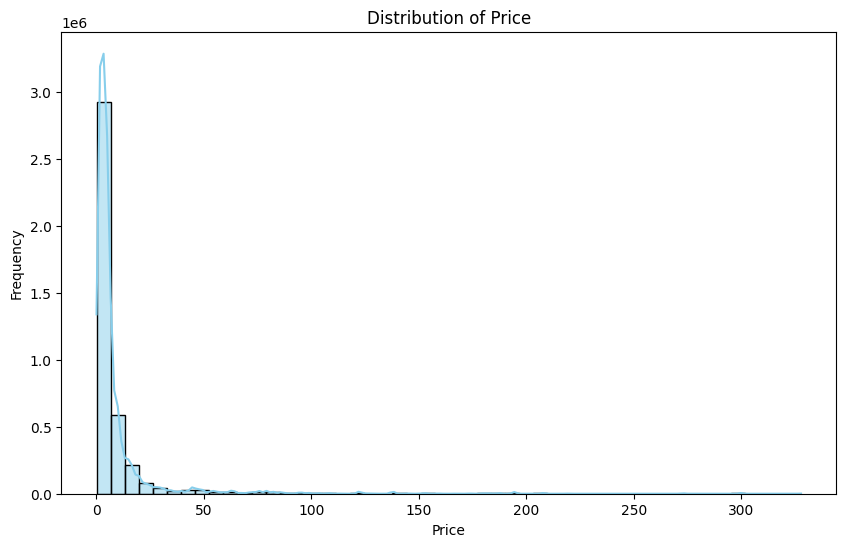

In [ ]:
#Histogram of 'price'
plt.figure(figsize=(10, 6))
sns.histplot(df['price'], bins=50, kde=True, color='skyblue')
plt.title('Distribution of Price')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

Based on histogram above, we have visualise the distribution of price which divide into certain ranges. As we can observe, the price range from 0 to approximately 10 have the highest frequency. In addition, we can see that, the frequency is getting lower when the price is increasing. In sum, we can sum up that the common prices ranges within the dataset are from 0 to 50.



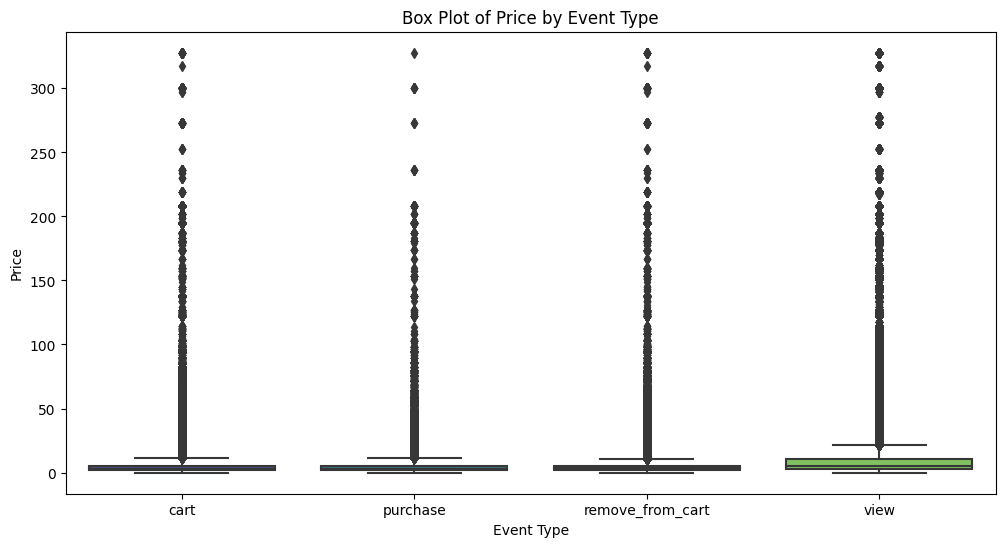

In [ ]:
#Box plot of 'price' by 'event_type'
plt.figure(figsize=(12, 6))
sns.boxplot(x='event_type', y='price', data=df, palette='viridis')
plt.title('Box Plot of Price by Event Type')
plt.xlabel('Event Type')
plt.ylabel('Price')
plt.show()

Based on boxplot above, we have visualise the distribution of price for each of the different event types. It is represent by the interquartile range (IQR) of prices.

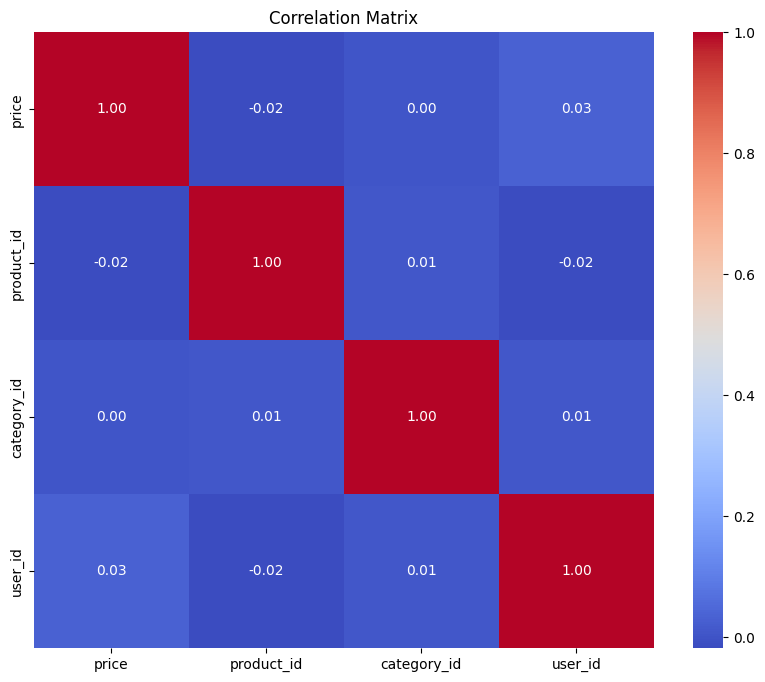

In [ ]:
#Correlation matrix heatmap
correlation_matrix = df[['price', 'product_id', 'category_id', 'user_id']].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

**Insights Gained:**



*   'price' and 'product_id' have a very weak negative correlation (-0.02), suggesting a minimal association.
*   'price' and 'category_id' show no linear correlation (0.00), indicating independence.
*   'price' and 'user_id' exhibit a very weak positive correlation (0.03), suggesting a minimal association.
*   'product_id' and 'user_id' have a very weak negative correlation (-0.02), indicating a minimal association.









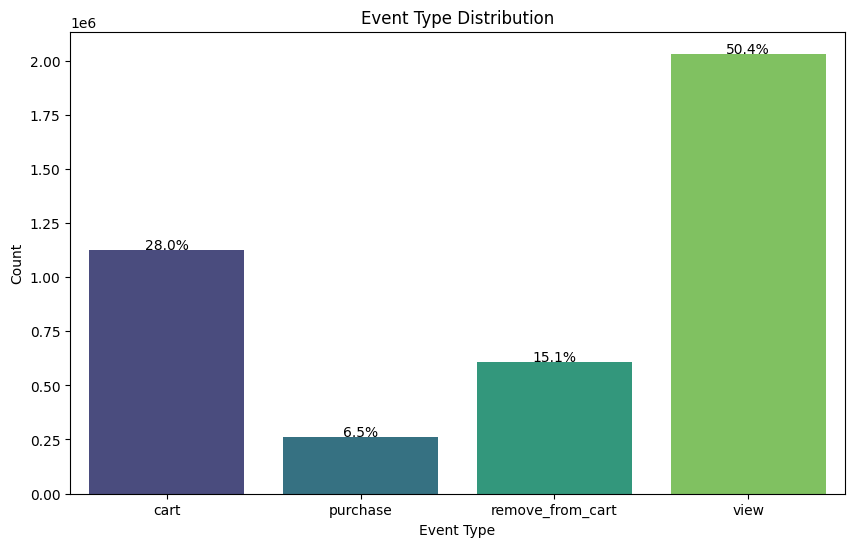

In [ ]:
#Group by event type and calculate counts
sizes_ = df.groupby(['event_type']).size().reset_index(name='Count')

#Plot bar plot for event type counts
plt.figure(figsize=(10, 6))
sns.barplot(x='event_type', y='Count', data=sizes_, palette='viridis')
plt.title('Event Type Distribution')
plt.xlabel('Event Type')
plt.ylabel('Count')

#Display percentage text on top of each bar
total = sizes_['Count'].sum()
for index, value in enumerate(sizes_['Count']):
    plt.text(index, value + 0.2, f'{(value/total)*100:.1f}%', ha='center')

plt.show()

Based on the histogram above, we have visualise the distribution of event type. As we can see that 'view' having the most which is 50.4% and following by cart which is 28.0%.

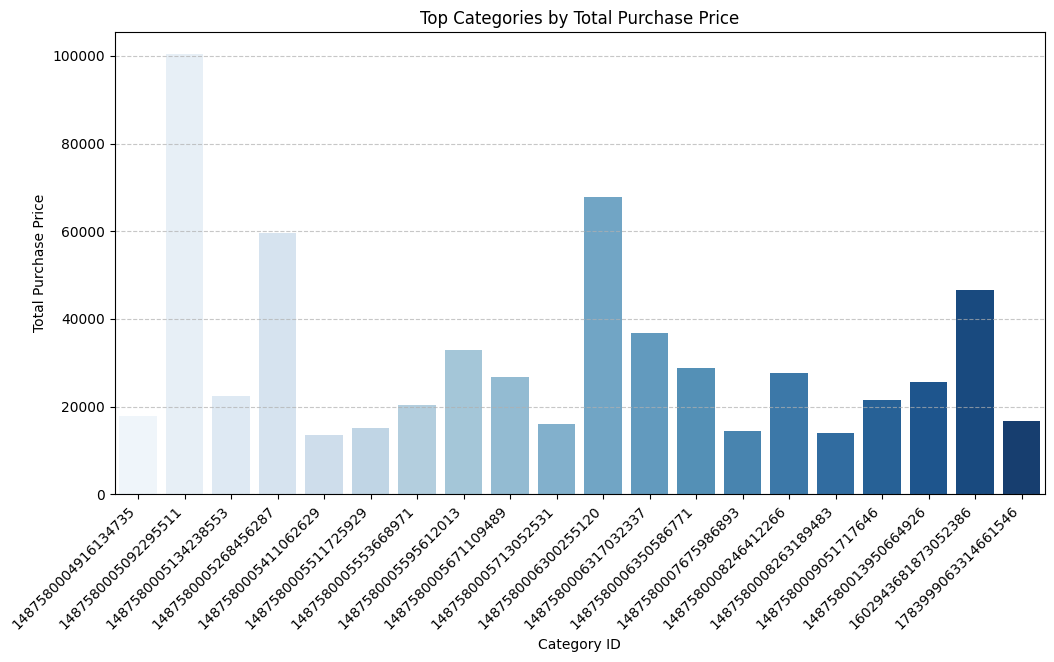

In [ ]:
#Filter purchase events
purchase_event = df[df['event_type'] == 'purchase']

#Group by category and calculate total purchase price
top_cat = purchase_event.groupby('category_id')['price'].sum().sort_values(ascending=False).head(20).reset_index()

#Bar plot of top categories by total purchase price
plt.figure(figsize=(12, 6))
sns.barplot(x='category_id', y='price', data=top_cat, palette="Blues")
plt.title('Top Categories by Total Purchase Price')
plt.xlabel('Category ID')
plt.ylabel('Total Purchase Price')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

The visualisation above shown the category with most orders. As we can observe from the bar plot, the category '1487580005092295511' have the most orders or total purchase price.

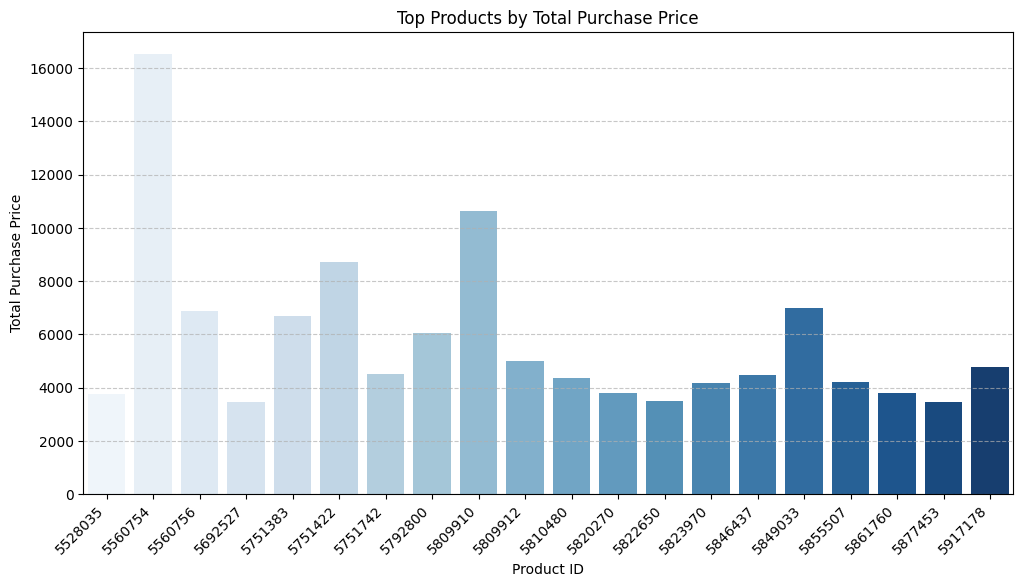

In [ ]:
#Filter purchase events
purchase_event = df[df['event_type'] == 'purchase']

#Group by product and calculate total purchase price
top_prod = purchase_event.groupby('product_id')['price'].sum().sort_values(ascending=False).head(20).reset_index()

#Bar plot of top products by total purchase price
plt.figure(figsize=(12, 6))
sns.barplot(x='product_id', y='price', data=top_prod, palette="Blues")
plt.title('Top Products by Total Purchase Price')
plt.xlabel('Product ID')
plt.ylabel('Total Purchase Price')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

The visualisation above shown the product with most orders. As we can observe from the bar plot, the product '5560754' have the most orders or total purchase price.

<ipython-input-44-af7b7a6ab3e5>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  purchase_event['brand'] = purchase_event['brand'].apply(lambda x: x.lower() if isinstance(x, str) else x)


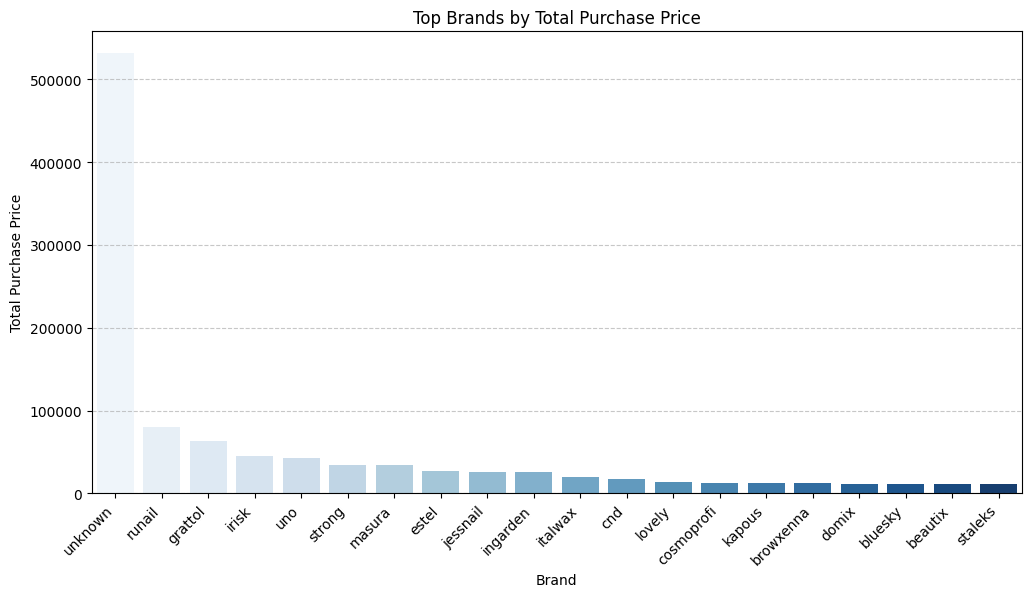

In [ ]:
#Filter purchase events and clean 'brand' column
purchase_event['brand'] = purchase_event['brand'].apply(lambda x: x.lower() if isinstance(x, str) else x)
top_brand = purchase_event[purchase_event['brand'].notna()]

#Group by brand and calculate total purchase price
top_brand = top_brand.groupby('brand')['price'].sum().sort_values(ascending=False).head(20).reset_index()

#Bar plot of top brands by total purchase price
plt.figure(figsize=(12, 6))
sns.barplot(x='brand', y='price', data=top_brand, palette="Blues")
plt.title('Top Brands by Total Purchase Price')
plt.xlabel('Brand')
plt.ylabel('Total Purchase Price')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

The visualisation above shown the brand with most orders. As we can observe from the bar plot, the brand 'runail' have the most orders or total purchase price. We also can see that there is a lot of unknown.

<ipython-input-45-691e6ebd344a>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  purchase_event['event_time'] = pd.to_datetime(purchase_event['event_time'])
<ipython-input-45-691e6ebd344a>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  purchase_event['event_dt'] = purchase_event['event_time'].dt.date
<ipython-input-45-691e6ebd344a>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the d

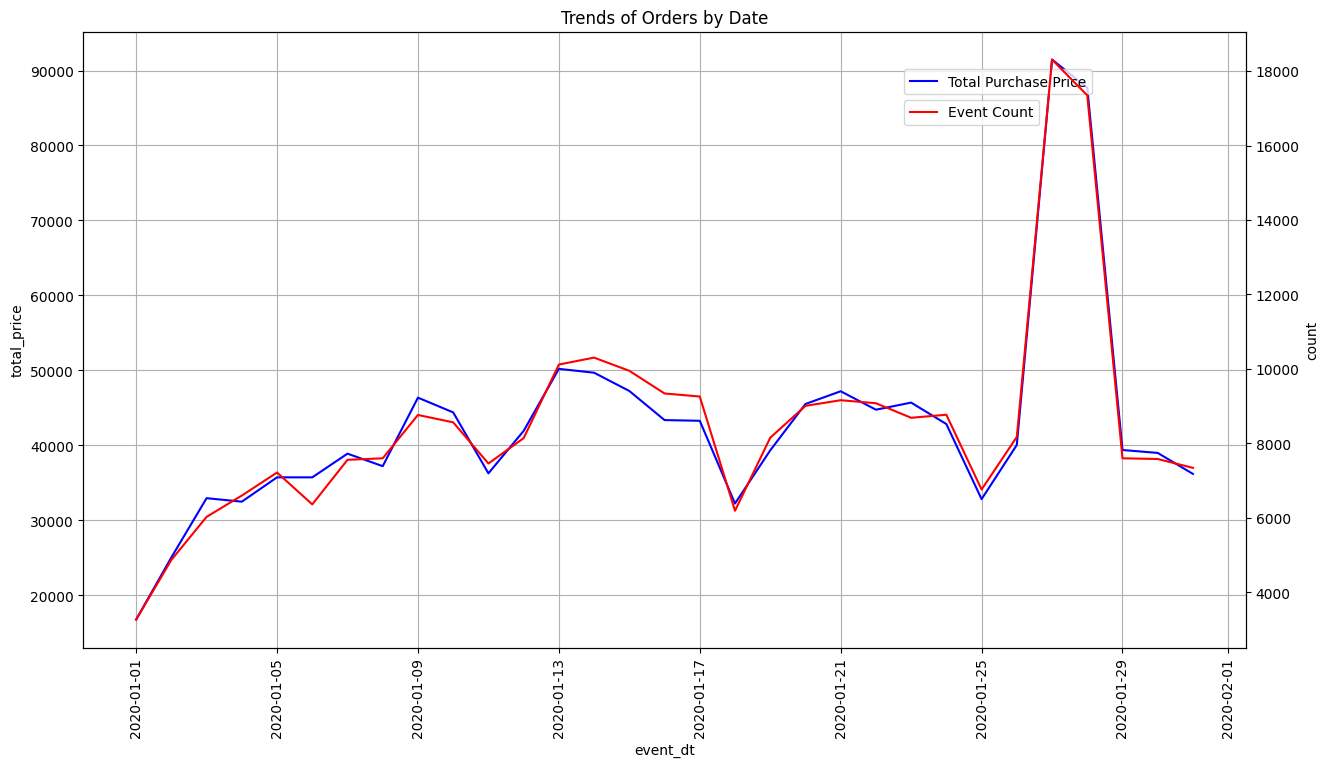

In [ ]:
#Convert the timestamp column to datetime format
purchase_event['event_time'] = pd.to_datetime(purchase_event['event_time'])

#Extract date, hour, and day of the week from the timestamp
purchase_event['event_dt'] = purchase_event['event_time'].dt.date
purchase_event['event_dt_h'] = purchase_event['event_time'].dt.hour
purchase_event['event_dt_w'] = purchase_event['event_time'].dt.dayofweek

#Convert the date column to datetime format
purchase_event['event_dt'] = pd.to_datetime(purchase_event['event_dt'])

#Group by date and calculate total purchase price
top_day = purchase_event.groupby(['event_dt'])['price'].sum().to_frame('total_price').reset_index()

#Group by date and calculate the count of events
top_day_count = purchase_event.groupby(['event_dt'])['event_dt'].count().to_frame('count').reset_index()

#Create a dual-axis line plot to show order trends and counts on the same plot
fig, ax = plt.subplots(figsize=(15, 8))

#Plot total purchase price on the primary axis (left)
sns.lineplot(x="event_dt", y="total_price", data=top_day, ax=ax, color="blue", label='Total Purchase Price')

#Create a secondary y-axis (right) for event counts
ax2 = ax.twinx()
sns.lineplot(x="event_dt", y="count", data=top_day_count, ax=ax2, color='red', label='Event Count')

#Customize plot appearance
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
ax.grid(True)
ax.set_title('Trends of Orders by Date')

#Add legends for both axes
ax.legend(loc='upper left', bbox_to_anchor=(0.7, 0.95))
ax2.legend(loc='upper left', bbox_to_anchor=(0.7, 0.9))

plt.show()

The graph above visualises the daily trends of purchase orders over time. The blue line represents the total purchase price for each day, while the red line shows the count of purchase events on the same plot. The y-axis on the left corresponds to the total purchase price, and the y-axis on the right corresponds to the count of purchase events.

**Insights Gained:**

* The plot allows us to observe the relationship between the total purchase amount and the number of purchase events on a daily basis.
* The blue line provides insights into the overall spending trends, showing days with higher or lower total purchase amounts.
* The red line indicates the daily variation in the number of purchase events, helping to identify days with increased or decreased purchasing activity.

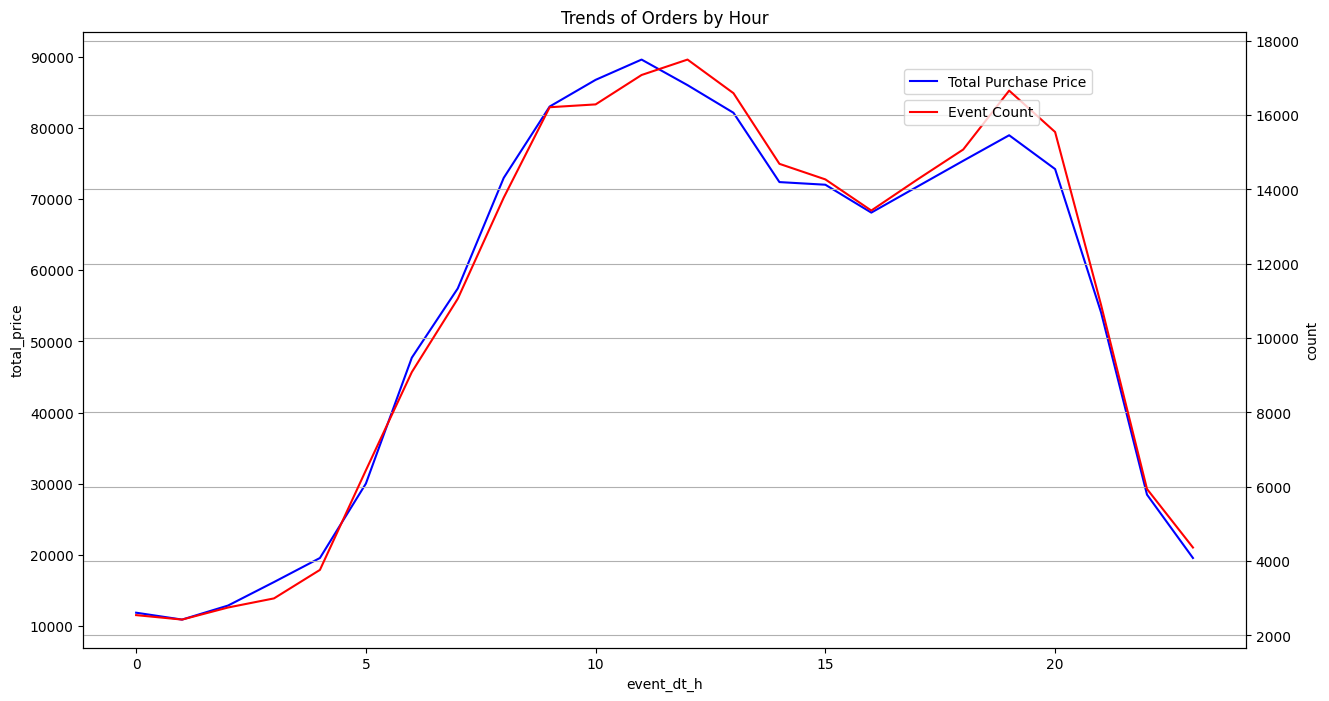

In [ ]:
#Group by hour and calculate total purchase price
top_time = purchase_event.groupby(['event_dt_h'])['price'].sum().to_frame('total_price').reset_index()

#Group by hour and calculate the count of events
top_time_count = purchase_event.groupby(['event_dt_h'])['event_dt_h'].count().to_frame('count').reset_index()

#Create a dual-axis line plot to show order trends and counts on the same plot
fig, ax = plt.subplots(figsize=(15, 8))

#Plot total purchase price on the primary axis (left)
sns.lineplot(x="event_dt_h", y="total_price", data=top_time, ax=ax, color="blue", label='Total Purchase Price')

#Create a secondary y-axis (right) for event counts
ax2 = ax.twinx()
sns.lineplot(x="event_dt_h", y="count", data=top_time_count, ax=ax2, color='red', label='Event Count')

#Customize plot appearance
plt.xticks(rotation=90)
plt.grid(True)
plt.title('Trends of Orders by Hour')

#Add legends for both axes
ax.legend(loc='upper left', bbox_to_anchor=(0.7, 0.95))
ax2.legend(loc='upper left', bbox_to_anchor=(0.7, 0.9))

plt.show()

The graph visualises the trends of purchase orders by the hour of the day, breaking down the data into hourly intervals. It includes both the total purchase price (blue line) and the count of purchase events (red line) on the same plot. The x-axis represents the hours of the day.

**Insights Gained:**

* The blue line shows the variation in total purchase amounts throughout the day, highlighting peak and off-peak hours.
* The red line represents the count of purchase events each hour, indicating the hourly distribution of purchase activities.

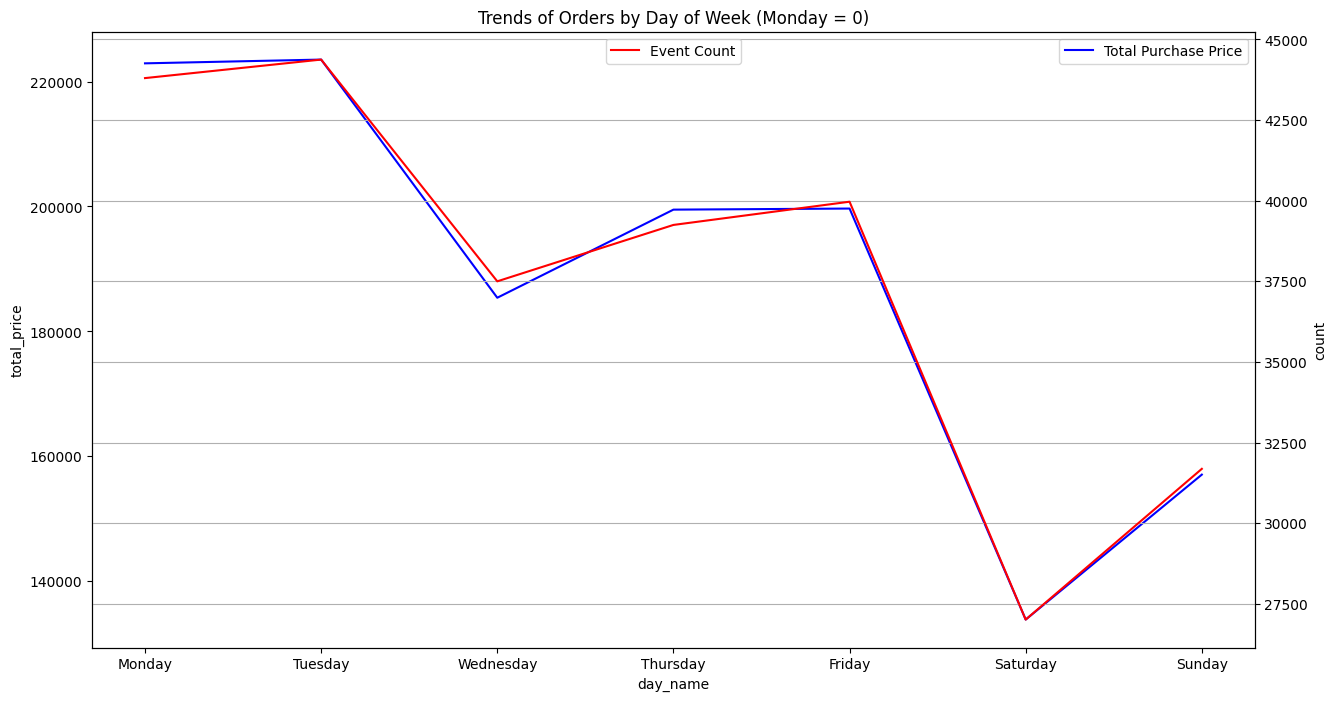

In [ ]:
#Group by day of the week and calculate total purchase price
top_week = purchase_event.groupby(['event_dt_w'])['price'].sum().to_frame('total_price').reset_index()

#Group by day of the week and calculate the count of events
top_week_count = purchase_event.groupby(['event_dt_w'])['event_dt_w'].count().to_frame('count').reset_index()

#Reorder days of the week starting from Monday
days_order = [0, 1, 2, 3, 4, 5, 6]  # 0 = Monday, 1 = Tuesday, ..., 6 = Sunday
top_week['event_dt_w'] = pd.Categorical(top_week['event_dt_w'], categories=days_order, ordered=True)
top_week_count['event_dt_w'] = pd.Categorical(top_week_count['event_dt_w'], categories=days_order, ordered=True)

#Map numeric labels to day names
day_names = {0: 'Monday', 1: 'Tuesday', 2: 'Wednesday', 3: 'Thursday', 4: 'Friday', 5: 'Saturday', 6: 'Sunday'}
top_week['day_name'] = top_week['event_dt_w'].map(day_names)
top_week_count['day_name'] = top_week_count['event_dt_w'].map(day_names)

#Create a dual-axis line plot to show order trends and counts on the same plot
fig, ax = plt.subplots(figsize=(15, 8))

#Plot total purchase price on the primary axis (left)
sns.lineplot(x="day_name", y="total_price", data=top_week, ax=ax, color="blue", label='Total Purchase Price')

#Create a secondary y-axis (right) for event counts
ax2 = ax.twinx()
sns.lineplot(x="day_name", y="count", data=top_week_count, ax=ax2, color='red', label='Event Count')

#Customize plot appearance
plt.xticks(rotation=90)
plt.grid(True)
plt.title('Trends of Orders by Day of Week (Monday = 0)')

#Add legend at the upper center
plt.legend(loc='upper center')

plt.show()

The graph visualises the trends of purchase orders by the day of the week, breaking down the data into daily intervals. It includes both the total purchase price (blue line) and the count of purchase events (red line) on the same plot. The x-axis represents the days of the week, starting from Monday (0) to Sunday (6).

**Insights Gained:**

* The blue line shows the variation in total purchase amounts throughout the week, highlighting days with higher or lower spending.
* The red line represents the count of purchase events each day, indicating peak activity days.
* The plot provides insights into the weekly patterns of purchase behavior, helping to identify the most active days and potential correlations between total spending and event count.

**Insights Gained:**

* The trends of total purchase amounts and the count of purchase events by date indicate a positive correlation. As total spending increases, the number of purchase events also tends to rise.
* Specific dates, such as 26, 27, and 28, stand out with higher order counts. Further analysis can explore if there is seasonality or specific promotions on these dates.
* The trends of orders by hour showcase consistency in both total purchase amounts and the count of events between 8 to 19 hours. There is a stable purchasing behavior during standard business hours.
* Order count spikes as we get close to weekday and is highest on Tuesday. This indicates that users tend to make more purchases towards the start of the week.

In [ ]:
# Extract the week information from the 'event_time' column
df['event_week'] = df['event_time'].dt.to_period('W').dt.start_time

# Group by the extracted 'event_week' and 'event_type', and count the events
event_type_count = df.groupby(["event_week", "event_type"]).size().reset_index(name="event_count")

# Create a bar chart comparing event counts between weeks
fig = px.bar(event_type_count, x="event_week", y="event_count", color="event_type", title="Events by Week")
fig.update_xaxes(type='category')  # Ensure the x-axis is treated as categorical
fig.show()

Based on the bar chart above, we have visualise the event_type, event_week and event_count to show and compare the number of different event type for each week.

In [ ]:
# Extract the week information from the 'event_time' column
df['event_week'] = df['event_time'].dt.to_period('W').dt.start_time

# Group by the extracted 'event_week' and 'event_type', and count the events
event_type_count = df.groupby(["event_week", "event_type"]).size().reset_index(name="event_count")

# Define the weeks for analysis
weeks = df['event_week'].unique()

# Create a weekly user behavior funnel chart
for week in weeks:
    week_data = event_type_count.query("event_week == @week & event_type != 'remove_from_cart'") \
                                  .sort_values("event_count", ascending=False)

    fig = px.funnel(week_data, x='event_count', y='event_type', title=f"Online user behavior funnel analysis, {week}")
    fig.show()

Based on the funnel chart above, we have visualise the weekly user behavior based on the event type of view, cart and purchase.

### 5.3. Data Exploration

Top 5 Repurchased Products:

In [ ]:
#Filter data for purchases
all_purchase = df.query("event_type=='purchase'")[["product_id", "category_id", "price", "user_id", "user_session"]]

#Group by product_id and category_id, and count the number of purchases
purchase_counts = all_purchase.groupby(['product_id', 'category_id']).size().reset_index(name='purchase_count')

#Sort by purchase_count in descending order
top_repurchased_products = purchase_counts.sort_values(by='purchase_count', ascending=False).head(5)

#Display the top repurchased products
print("Top 5 Repurchased Products:")
print(top_repurchased_products[['product_id', 'category_id', 'purchase_count']])


Top 5 Repurchased Products:
       product_id          category_id  purchase_count
10764     5809910  1602943681873052386            2029
17736     5854897  1487580009445982239            1065
3354      5686925  1487580009311764506            1001
10766     5809912  1602943681873052386             953
4183      5700037  1487580009286598681             813


Products with Largest Average Repurchased Count:

In [ ]:
from IPython.display import display, Markdown

#Group by product_id and user_id, and count the number of purchases
product_purchase_count = all_purchase.groupby(["product_id", 'user_id']).size().rename("purchase_count").reset_index()

#Calculate the average purchase count for each product
avg_product_purchase_count = product_purchase_count.groupby("product_id").purchase_count.mean().rename("avg_purchase_count").sort_values(ascending=False).reset_index()

#Get the value for the 5th largest average repurchased count
top_5_count_value = avg_product_purchase_count.nlargest(4, "avg_purchase_count").iloc[-1, 1]

#Display the top 5 products with the largest average repurchased count
mdquery = "Products with the largest average repurchased count:"
display(Markdown(mdquery))
display(avg_product_purchase_count.query("avg_purchase_count >= @top_5_count_value"))

Products with the largest average repurchased count:

,product_id,avg_purchase_count
0,5854171,4.0
1,5854180,4.0
2,5850311,4.0
3,5869448,3.0
4,5833657,3.0
5,5804614,3.0
6,5831612,3.0
7,5922165,3.0


Top 5 Categories with the Largest Average Repurchased Count:

In [ ]:
#Group by category_id and user_id, and count the number of purchases
category_purchase_count = all_purchase.groupby(["category_id", 'user_id']).size().rename("purchase_count").reset_index()

#Calculate the average purchase count for each category
avg_category_purchase_count = category_purchase_count.groupby("category_id").purchase_count.mean().rename("avg_purchase_count").sort_values(ascending=False).reset_index()

#Get the value for the 5th largest average repurchased count
top_5_count_value = avg_category_purchase_count.nlargest(5, "avg_purchase_count").iloc[-1, 1]

#Display the top 5 categories with the largest average repurchased count
mdquery = "Top 5 categories with the largest average repurchased count:"
display(Markdown(mdquery))
display(avg_category_purchase_count.query("avg_purchase_count >= @top_5_count_value"))

Top 5 categories with the largest average repurchased count:

,category_id,avg_purchase_count
0,1924049106385240809,4.814286
1,1487580007675986893,4.700298
2,1487580005134238553,4.654676
3,1487580005427839846,4.309820
4,1487580005671109489,4.284517


Most Purchased Product by Different User:

In [ ]:
#Group by product_id and count the number of unique users who purchased each product
most_purchased = all_purchase.groupby("product_id").user_id.nunique().rename("user_buys").sort_values(ascending=False).reset_index().head(1)

#Display the most purchased product by unique users
mdquery = "The most purchased product is **product #" + str(most_purchased.loc[0, "product_id"]) + "**. It is purchased by " \
           + str(most_purchased.loc[0, "user_buys"]) + " different users."
display(Markdown(mdquery))

The most purchased product is **product #5809910**. It is purchased by 1932 different users.

The User with the Highest Purchase Frequency:

In [ ]:
# Extract the week information from the 'event_time' column
df['event_week'] = df['event_time'].dt.to_period('W').dt.start_time

# Filter purchase events and group by user_id and event_week
purchase_count_weekly = df.query("event_type == 'purchase'") \
                                  .groupby(["user_id", "event_week"]).product_id.count().rename("purchase_count") \
                                  .reset_index()

# Find the user with the highest purchase frequency
loyal_user_weekly = purchase_count_weekly.groupby("user_id").purchase_count.sum().reset_index() \
                                         .sort_values(by="purchase_count", ascending=False).head(1)

# Print the result using iloc to access the first row by integer index
if not loyal_user_weekly.empty:
    print(f"The user with the highest purchase frequency on a weekly basis is user #{loyal_user_weekly.iloc[0]['user_id']}. "
          f"This user purchased {loyal_user_weekly.iloc[0]['purchase_count']} times.")
else:
    print("No purchase data available.")

The user with the highest purchase frequency on a weekly basis is user #469299888. This user purchased 262 times.


The User who Purchase Most Items:

In [ ]:
# Extract the week information from the 'event_time' column
df['event_week'] = df['event_time'].dt.to_period('W').dt.start_time

# Filter purchase events and group by user_id
purchase_count_weekly = df.query("event_type == 'purchase'") \
                                  .groupby(["user_id"]).product_id.count().rename("purchase_count") \
                                  .reset_index()

# Find the user who purchased the most number of items
loyal_user = purchase_count_weekly.sort_values(by="purchase_count", ascending=False).head(1)

# Display the result
if not loyal_user.empty:
    mdquery = f"The user who purchased the most number of items is **user #{loyal_user.iloc[0]['user_id']}**. " \
               f"This user purchased {loyal_user.iloc[0]['purchase_count']} items."
    display(Markdown(mdquery))
else:
    print("No purchase data available.")

The user who purchased the most number of items is **user #469299888**. This user purchased 262 items.

**Insights Gained:**

Top 5 Repurchased Products:

* Product #5809910 from category ID 1602943681873052386 is the most repurchased product with a count of 2029 purchases.
* The top 5 repurchased products are dominated by product #5809910, indicating a high level of popularity and demand for this item.

Products with the Largest Average Repurchased Count:
* Products with IDs 5854171, 5854180, and 5850311 have the largest average repurchased count, each with an average of 4.0.
* This suggests that these products are not only frequently repurchased but also maintain a consistent level of demand over time.

Top 5 Categories with the Largest Average Repurchased Count:

* Categories with category IDs 1924049106385240809, 1487580007675986893, and 1487580005134238553 have the largest average repurchased count, indicating sustained popularity in these categories.

Most Purchased Product:

* The most purchased product is #5809910, bought by 1932 different users. This highlights a widespread appeal and adoption of this specific product.

User with the Highest Weekly Purchase Frequency:

* User #469299888 has the highest purchase frequency on a weekly basis, making 262 purchases. This user demonstrates a consistently high engagement level with the online store.

User with the Most Number of Purchased Items:

* User #469299888 has also purchased the most number of items, totaling 262. This user stands out as a significant contributor to the overall purchase count.



### 5.4. Feature Engineering

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4032102 entries, 0 to 4264751
Data columns (total 9 columns):
 #   Column        Dtype         
---  ------        -----         
 0   event_time    datetime64[ns]
 1   event_type    category      
 2   product_id    int64         
 3   category_id   int64         
 4   brand         object        
 5   price         float64       
 6   user_id       int64         
 7   user_session  object        
 8   event_week    datetime64[ns]
dtypes: category(1), datetime64[ns](2), float64(1), int64(3), object(2)
memory usage: 280.7+ MB


The feature engineering is not applicable as there is no need to create new features or transform existing ones to support our analysis.

## 6. Conclusion

**Insights Gained and Key Findings through the EDA Process:**

1. Price Distribution:

* The histogram analysis of prices indicates that the majority of products fall within the price range of 0 to approximately 10, with a decreasing frequency as prices increase. Common price ranges within the dataset are observed to be from 0 to 50.

2. Correlation Analysis:

* Correlation matrix heatmap reveals weak associations between 'price' and other variables ('product_id', 'category_id', 'user_id'). Notably, 'price' and 'category_id' show no linear correlation, suggesting independence.

3. Event Type Distribution:

* The histogram of event types illustrates that 'view' is the most frequent event type, constituting 50.4% of all events, followed by 'cart' with 28.0%. This suggests that a significant portion of user interactions involves product viewing.

4. Top Categories and Products:

* Categories '1487580005092295511' and product '5560754' emerge as the most popular based on the bar plots. Additionally, the brand 'runail' dominates in terms of orders or total purchase price.

5. Daily Trends:

* Daily trends showcase a positive correlation between total purchase amounts and the count of purchase events. Specific dates, such as 26, 27, and 28, exhibit higher order counts, indicating potential seasonality or promotional events.

6. Hourly and Weekly Trends:

* Hourly trends reveal consistent purchasing behavior between 8 to 19 hours. Order count spikes as the weekend approaches and is highest on Tuesday, indicating variations in user activity based on the day of the week.

7. Weekly User Behavior:

* The bar chart and funnel chart visualize weekly user behavior, emphasizing the count and progression of different event types. These charts provide insights into user engagement and conversion rates throughout the weeks.

8. Top Repurchased Products and User Engagement:

* Specific products, such as #5809910, emerge as highly repurchased, emphasizing their sustained popularity. User #469299888 stands out with the highest weekly purchase frequency and the most number of purchased items, indicating a loyal and engaged customer.

9. Categories with High Average Repurchased Count:

* Certain categories exhibit a consistently high average repurchased count, indicating sustained popularity and customer loyalty.

In conclusion, the EDA process has provided a comprehensive understanding of user interactions, product preferences, and purchasing patterns. These insights can inform strategic decisions related to inventory management, marketing strategies, and user engagement initiatives to enhance the overall performance of the online store.